<a href="https://colab.research.google.com/github/AnshUpadhyay639/LinearRegressionPyTorch/blob/main/CustomLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #Colab already has Pytorch preinstalled in it
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
print(torch.__version__)

2.5.1+cu121


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#Setup Device Agnostic Code:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cpu


In [ ]:
tensor = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
tensor.shape

torch.Size([2, 2, 2])

###Note: torch.rand() generates numbers that are strictly between 0 and 1 meanwhile torch.randn() generates numbers that can be positive or negative and are centered around 0.

In [ ]:
random = torch.rand(2,2,2,dtype=torch.float64) #Creating a random Tensor with giving the input shape and dtype optional
random

tensor([[[0.0582, 0.0629],
         [0.1236, 0.0526]],

        [[0.5262, 0.4768],
         [0.9552, 0.9288]]], dtype=torch.float64)

In [ ]:
tensor = torch.randn(1, requires_grad = True, dtype=torch.float) #Creating a random Tensor with giving the input shape and dtype optional
tensor

tensor([0.4617], requires_grad=True)

###Creating some known data using Linear Regression Formula ( y = mx + c) to make a st. line with known parameters where m = weight and c = bias. Aim is to get the model to learn the relationship between X and Y as it does not know the formula. We give the model an random data in the form of X and it calculates Y itself and learns the relationship between them.

In [ ]:
#Creating known parameters:
weight = 0.7
bias = 0.3

#Creating random input data:
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1) # X stores the Quentions/Data && Y stores the Answers/Labels
Y = weight * X + bias
print(f"Input numbers: {X[:10]}, Output numbers: {Y[:10]}")

Input numbers: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]), Output numbers: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
len(X), len(Y)

(50, 50)

In [ ]:
#Create train/test split:

train_split = int(0.8 * len(X))             #80% of X -->means--> 80/100 or 0.8
X_train = X[:train_split]                   #Contains the first 40(80% of 50 = 40) elements from the start (Starting 40 Qtns)
Y_train = Y[:train_split]                   #Same for Y as 80% of both (X and Y) is given to the model to learn the Question and Answers. (Starting 40 Ans)
X_test = X[train_split:]                    #Contains the last 10(20% of 50 = 10) elements from the 'train_split'
Y_test = Y[train_split:]                    #same as above

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
X_train.squeeze(1), X_test

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]))

###Data Visualization in the form of graphs:

In [ ]:
def plot_predictions(traindata = X_train, trainlabels = Y_train, testdata = X_test, testlabels = Y_test, predictions = None): #Assigning default values which can also be overwritten by calling the same func with diff params
  #Create an empty new figure
  plt.figure(figsize = (10,7)) #(Width, Height)

  plt.xlabel("X-axis",fontsize=12)
  plt.ylabel("Y-axis",fontsize=12)

  plt.scatter(traindata,trainlabels, c = "b", s = 10, label = "Training Data") #Scatter(X-axis, Y-axis, color, size, name)

  plt.scatter(testdata, testlabels, c="g", s = 5, label = "Testing Data") #Rest 10% of the line

  if predictions is not None:
    plt.scatter(testdata, predictions, c="r", s=5, label = "Predictions")

  plt.legend(prop={"size" : 20}) #Legend describes about the color and the label name in a small box for EZ understanding (prop ->properties)

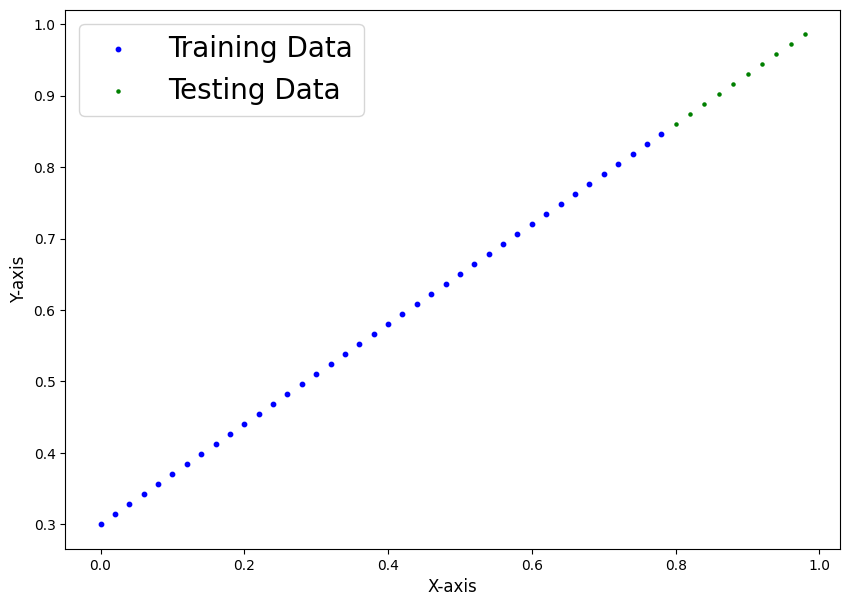

In [ ]:
plot_predictions() #St. line because of 'Y = mX + C'

###Building our first Linear Regression Model:
What our model does:
1. Start with random values (weight & bias).

2. Look at training data and adjust the random values to get closer to the ideal values of weight and bias (which we used to create the data).

###How can we make the random values such that it makes a st. Line:
1. *Gradient Descent Algorithm*     (Prerequisite: requires_grad = True (To record the gradients throughout))

2. *Back Propagation*               (Recorded gradients of 'weights' and 'bias' are updated in this step)

In [ ]:
class LinearRegressionModel(nn.Module):         #(Inheritance : "nn.Module" is the base class for all neural networks)
  def __init__(self):                           #Constructor of base class. When defining methods inside a class, self is used to access and modify the instance variables.
    super().__init__()                          #Calling the constructor of super/base class to make sure our class properly inherits all the necessary functionalities for it to behave like a NN.
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float32)) #Converts a tensor to a Module parameter
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float32)) #requires_grad = True -->ByDefault, Shape = 1 (Scalar).

    #Forward Propagation function:
  def forward(self, x: torch.Tensor) -> torch.Tensor: #This func takes input data as X (dtype = torch.Tensor) and returns a 'torch.Tensor'
    return self.weights * x + self.bias       #Calculates 'Y' on the basis of Linear Regression Formula

*def forward() - All torch.nn.Module subclasses requires you to overwrite forward() always. This method defines what happens during the forward propagation in every epoch in the neural network.

*torch.optim - Contains various optimization algos which tell the nn.Parameters how to best change to improve gradient descent and in turn reduce the loss

In [ ]:
#Alternative way: Using Linear Layer/ Probing Layer/ Linear Transform/ Fully Connected Layer/ Dense Layer.
class LinearRegressionModelV2(nn.Module):
  def __innit__(self):
    super().__innit__()
    #Use nn.Linear Layer for creating and initializing parameters i.e.(wts & bias) itelf
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1) # Because 1 to 1 relationship is b/w Input value and O/P value

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
#Create a random seeds because our model parameters are also random
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel()

In [ ]:
list(model_0.parameters()) #list or tuple

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict() #Returns the state of the whole Module with named parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight ,  bias # We want to bring the above weight and bias close to this one for our model to work perfectly (in this case we know the ideal values)

(0.7, 0.3)

In [ ]:
#Make predictions with Model
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
#Model predictions Without gradient tracking which saves us time in case of very large datasets
with torch.inference_mode(): #OR torch.no_grad() //outdated
  y_pred2 = model_0(X_test)

y_pred2

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test #y_pred2 should be as close to this as possible

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

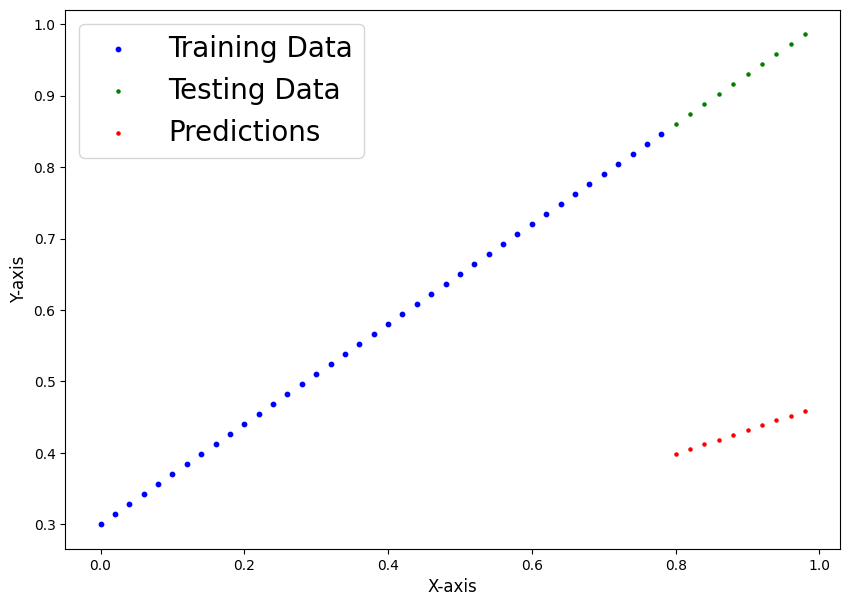

In [ ]:
plot_predictions(predictions=y_pred2) #Initially the model predicts random values

In [ ]:
#Setting up a Loss Function / Cost Function / Criterion:
Loss_fn = nn.L1Loss()   #Calculates the Mean Absolute Error (MAE): y_pred2 and y_test and then avg the diff of all the examples in it.
                        #Such pure Math related functions are used in the case of regression problems only
#OR

MAE_loss = torch.mean(torch.abs(y_pred2 - Y_test)) #Making ur own representation of the function

In [ ]:
#Setting up an Optimizer {Stochastic i.e(random) Gradient Descent} OR ADAM for gradients.
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01) #lr -> Learning Rate is a critical Hyperparameter

###**Learning Rate:** It controls how much the model's parameters (such as weights and biases) are adjusted during each step of the optimization process. The learning rate determines the size of the step taken in the direction of the gradient during training. If lr = 0.0001, it will effect the "7" from weight = 0.3367. If lr = 0.1, it will effect "3". If lr = 0.001, it will effect the "6" and so-on

In [ ]:
## Building a Training Loop:
torch.manual_seed(42)
epoch = 200 #Hyperparameter
epoch_count = []
train_losses = []
test_losses = []

for epoch in range(epoch):
  ## Training the Model:
  model_0.train() #Put the model in training mode (Set other layers such as Dropout and BatchNorm to True).

  y_pred = model_0(X_train) #1. Forward Pass on Training DataSet.

  train_loss = Loss_fn(y_pred,Y_train) #2. Calculate the Loss for Training DataSet (hence we used Y_train).

  optimizer.zero_grad() #3. Initialize all the gradients to zero for next fresh computation.

  train_loss.backward() #4. Perform Back Propagation on Loss w.r.t the model parameters (Gradients are computed during this step).

  optimizer.step() #5. Update the parameters of the model by performing Gradient Descent.


  ## Testing the Model:
  model_0.eval() #Put the model in evaluation mode and disables many other settings that are not required for testing/evaluation.

  with torch.inference_mode(): #Disables Gradient Calculations

    test_preds = model_0(X_test) #1. Forward Pass on Testing DataSet.

    test_loss = Loss_fn(test_preds, Y_test) #2. Calculate the Loss for Testing DataSet.

  if epoch % 10 == 0: # Track Parameters for every 10 epochs
    epoch_count.append(epoch)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f"Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Train Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Train Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Train Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Train Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Train Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Train Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Train Loss: 0.01758546568453312 | Test Loss: 0.040604822337627

###**Optimizer.zero_grad**:  It sets the gradients of all the model's parameters to zero. This is done before computing the gradients for the current batch, ensuring that old gradients from the previous training step are not mixed with the new gradients. This step is necessary because, By default, PyTorch accumulates gradients in the backward pass. Without clearing the gradients, the gradients from previous iterations will accumulate on top of the new gradients, leading to incorrect updates.

In [ ]:
## Making new Predictions with an Updated and Better Model
with torch.inference_mode():
  y_pred3 = model_0(X_test)

In [ ]:
model_0.state_dict() , print(f"Optimal Weight :{weight} , Optimal Bias: {bias}")

Optimal Weight :0.7 , Optimal Bias: 0.3


(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 None)

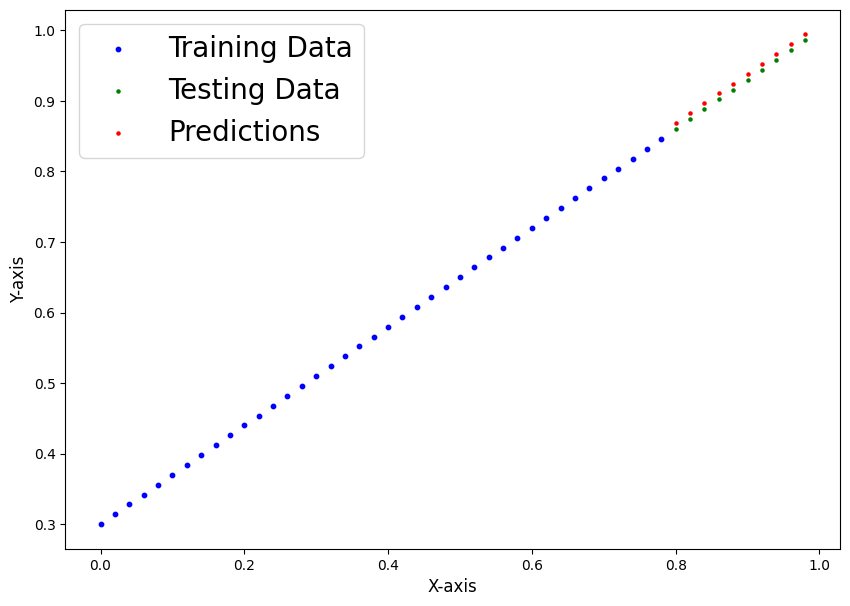

In [ ]:
plot_predictions(predictions=y_pred3) #We have to remove grads before putting in this func as this func uses numpy which does not know grad calculation hence requires_grad needs to be FALSE.

In [ ]:
epoch_count, test_losses, epoch_count

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)],
 [0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190])

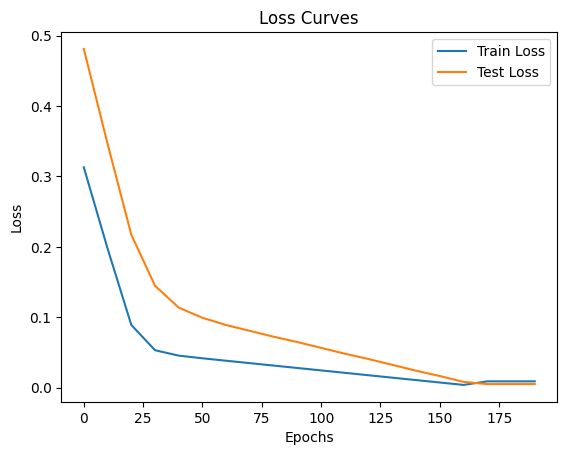

In [ ]:
## Plot the Loss Curves:
plt.plot(epoch_count, np.array(torch.tensor(train_losses).numpy()), label = "Train Loss") #Concerting to numpy array to avoid gradient tracking
plt.plot(epoch_count, test_losses, label = "Test Loss")
plt.title("Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend() # The point where the line meets is the convergence point and the model is said to be reached convergence after that point.

In [ ]:
# Saving our Pytorch Model:
from pathlib import Path

#1. Create Model's Directory
model_path = Path("models") #Set a Directory Name
model_path.mkdir(parents = True, exist_ok = True) #Make a new Directory with that Name

#2. Create Model Save Path
model_name = "Pytorch_Model_0.pt" # Extenstions can be 'pt' or 'pth'
model_save_path = model_path / model_name #Define Path to save the model

#3. Save the Model
torch.save(model_name, model_save_path)

#Or save the Model's State Dictionary only:
torch.save(model_0.state_dict(), model_save_path)

In [ ]:
!ls -l models #Validating if the model is there or not

total 4
-rw-r--r-- 1 root root 1544 Nov 18 16:37 Pytorch_Model_0.pt


In [ ]:
## Loading our Pytorch Model
#If only state of the model is stored then again create a new instance of the model
loaded_model_0 = LinearRegressionModel()

#Now load the saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(model_save_path))

#Validating the Original states
loaded_model_0.state_dict()

<ipython-input-69-6ed5cc5ab2e2>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(model_save_path))


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])